# Exploring data 

## **Contenido**

Con **10.781 registros y 9 variables**, este conjunto de datos ofrece información estructurada y completa sobre vehículos **BMW**.  
Entre las columnas se incluyen: modelo, año de fabricación, precio de venta, tipo de transmisión, kilometraje, tipo de combustible, impuesto anual de circulación, tamaño del motor y rendimiento de combustible (*mpg*).  

Cada fila corresponde a un **anuncio individual de un vehículo BMW**.  
Gracias a su limpieza y organización, los datos pueden utilizarse tanto para **análisis exploratorios** como para **aplicaciones de aprendizaje automático** (*machine learning*).

---

## **Contexto**

El **análisis de datos** es fundamental para comprender la **dinámica del mercado en el sector automotriz**.  
Este conjunto de datos se utiliza con frecuencia para **investigar tendencias de precios, valores de reventa y el impacto de las especificaciones** en el rendimiento de los vehículos, especialmente en proyectos de **Kaggle**, **investigaciones académicas** y **prácticas de ciencia de datos**.  

Tanto **compradores como vendedores** pueden usarlo para estudiar la **demanda del mercado** y las **variaciones de precios**.  
Además, puede emplearse para **entrenar modelos de machine learning** que evalúen el rendimiento del motor y la eficiencia de combustible en distintos modelos BMW, o para **predecir precios de automóviles**.

---

## **Casos de uso / Valor**

- **Predicción de precios:**  
  Estimar el precio de los automóviles en función de características como el kilometraje, el tamaño del motor y el año de fabricación.

- **Análisis de tendencias:**  
  Examinar la evolución de los tipos de combustible y transmisión a lo largo del tiempo.

- **Información de mercado:**  
  Comprender la demanda y el posible valor de reventa de los vehículos BMW.

- **Visualización de datos y proyectos de ML:**  
  Un excelente recurso para principiantes e investigadores que deseen **desarrollar proyectos de portafolio** y **practicar análisis de datos**.


In [1]:
import pandas as pd

df_bmw = pd.read_csv('../data/bmw.csv')

print("Valores nulos por columna:\n", df_bmw.isnull().sum())
print("valores duplicados:", df_bmw.duplicated().sum())
print(df_bmw[df_bmw.duplicated(keep=False)])
print(df_bmw.head())

Valores nulos por columna:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
valores duplicados: 117
          model  year  price transmission  mileage fuelType  tax   mpg  \
173          X4  2019  33998    Semi-Auto     7272   Diesel  150  42.8   
174          X4  2019  33998    Semi-Auto     7272   Diesel  150  42.8   
379          X1  2018  16995    Semi-Auto    17276   Petrol  150  46.3   
393          X1  2018  16995    Semi-Auto    17276   Petrol  150  46.3   
643    1 Series  2019  21898       Manual     4100   Petrol  150  41.5   
...         ...   ...    ...          ...      ...      ...  ...   ...   
9797   4 Series  2019  25449    Automatic     6890   Diesel  145  65.7   
9939         M3  2009  16950       Manual    65000   Petrol  580  21.9   
9940         M3  2009  16950       Manual    65000   Petrol  580  21.9   
9942   3 Series  2013  10985    A

- Elimina repetidos

In [2]:
df_bmw = df_bmw.drop_duplicates(keep='first')


- Tipos

In [3]:
print(df_bmw.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


- Distribución de cada variable


Estadísticas para la columna: price
Min: 1200, Max: 123456, Mean: 22692.88869092273, Median: 20261.5, Mode: 15000


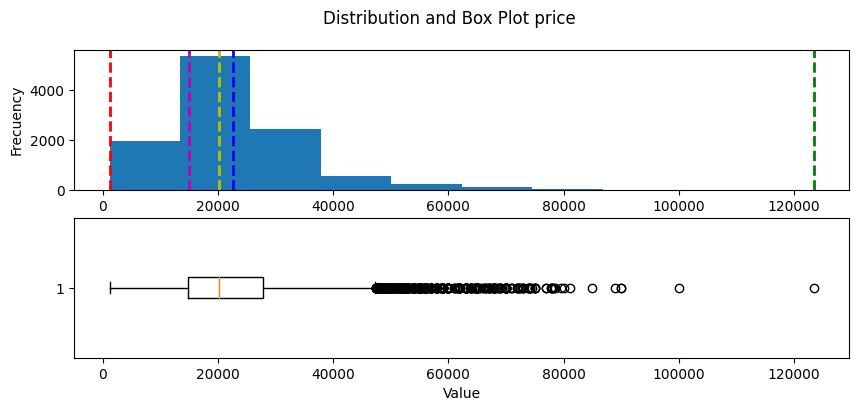


Estadísticas para la columna: mileage
Min: 1, Max: 214000, Mean: 25710.978994748686, Median: 18783.0, Mode: 10


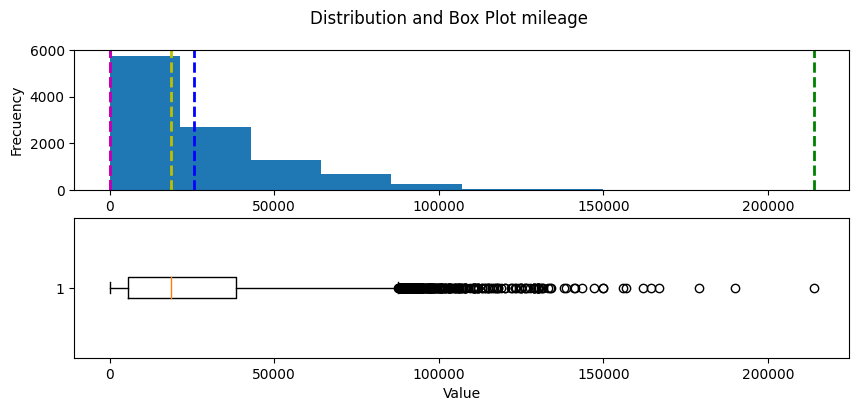


Estadísticas para la columna: tax
Min: 0, Max: 580, Mean: 131.59743060765192, Median: 145.0, Mode: 145


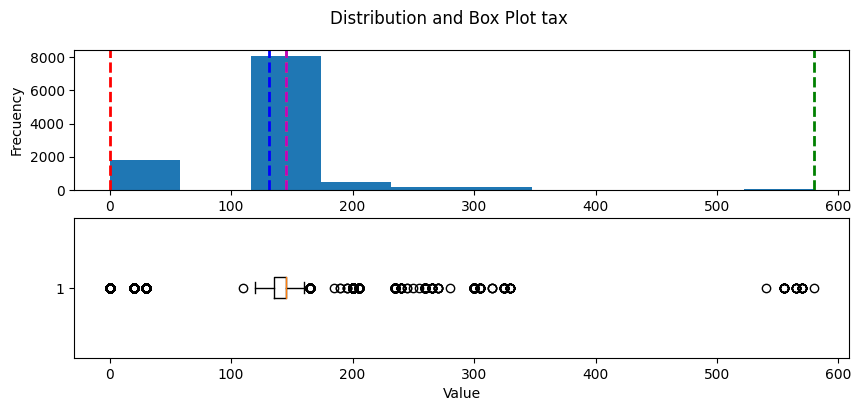


Estadísticas para la columna: mpg
Min: 5.5, Max: 470.8, Mean: 56.48312078019505, Median: 53.3, Mode: 65.7


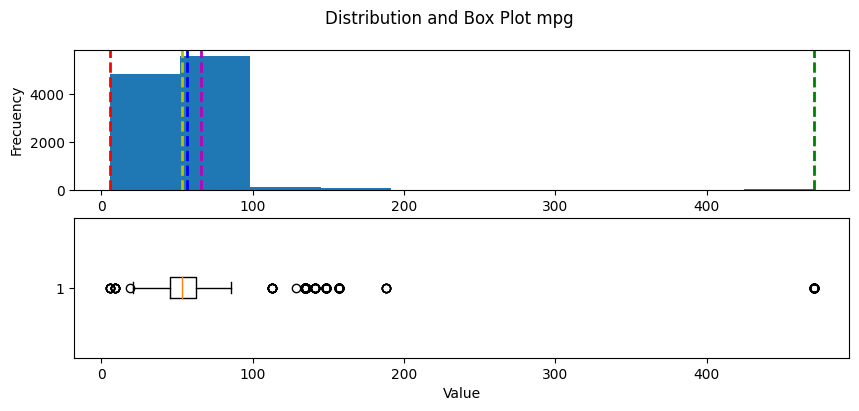


Estadísticas para la columna: engineSize
Min: 0.0, Max: 6.6, Mean: 2.1701612903225804, Median: 2.0, Mode: 2.0


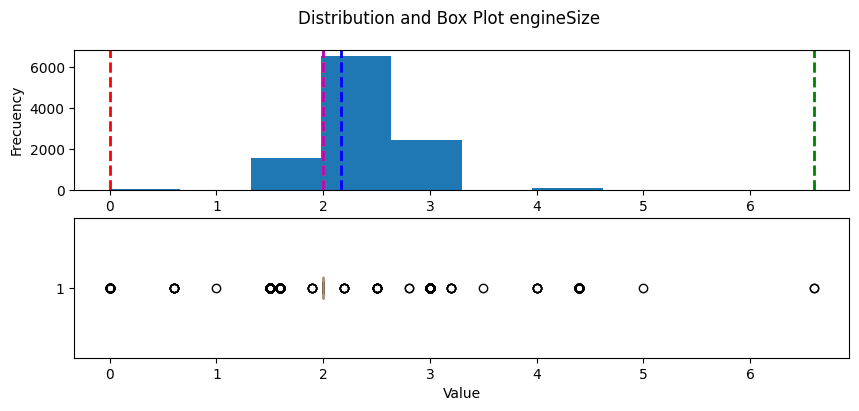

In [4]:
import matplotlib.pyplot as plt

for col in ["price","mileage","tax","mpg","engineSize"]:
    
    print (f"\nEstadísticas para la columna: {col}")
    s = pd.to_numeric(df_bmw[col], errors='coerce').dropna()
   
    min_val = s.min()
    max_val = s.max()
    mean_val = s.mean()
    med_val = s.median()
    mod_val = s.mode()[0]
    print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {med_val}, Mode: {mod_val}")

    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    ax[0].hist(s)
    ax[0].set_ylabel('Frecuency')

    ax[0].axvline(min_val, color='r', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(max_val, color='g', linestyle='dashed', linewidth=2, label='Max')
    ax[0].axvline(mean_val, color='b', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(med_val, color='y', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(mod_val, color='m', linestyle='dashed', linewidth=2, label='Mode')
    
    ax[1].boxplot(s, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle('Distribution and Box Plot {name}'.format(name=col))
    plt.show()

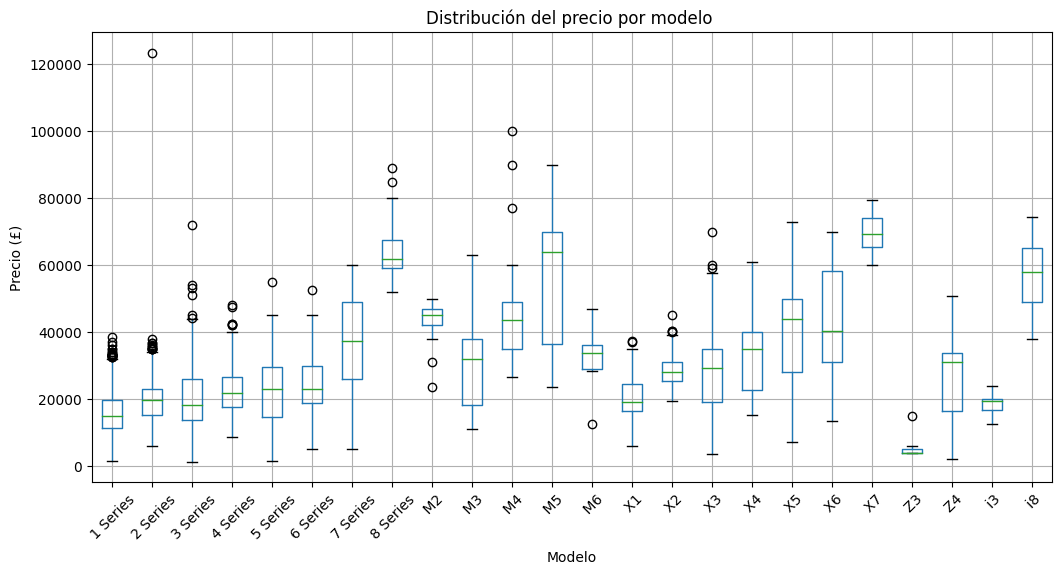

In [5]:
df_bmw.boxplot(column='price', by=['model'], figsize=(12,6))
plt.title("Distribución del precio por modelo ")
plt.suptitle("")  # elimina el título automático extra
plt.xlabel("Modelo")
plt.ylabel("Precio (£)")
plt.xticks(rotation=45)
plt.show()

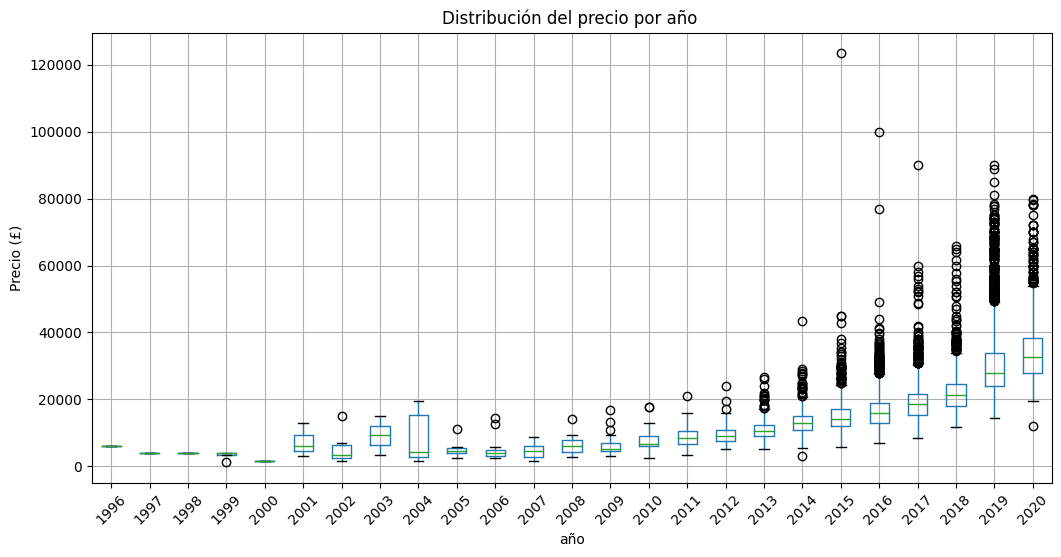

In [6]:
df_bmw.boxplot(column='price', by=['year'], figsize=(12,6))
plt.title("Distribución del precio por año ")
plt.suptitle("")  # elimina el título automático extra
plt.xlabel("año")
plt.ylabel("Precio (£)")
plt.xticks(rotation=45)
plt.show()

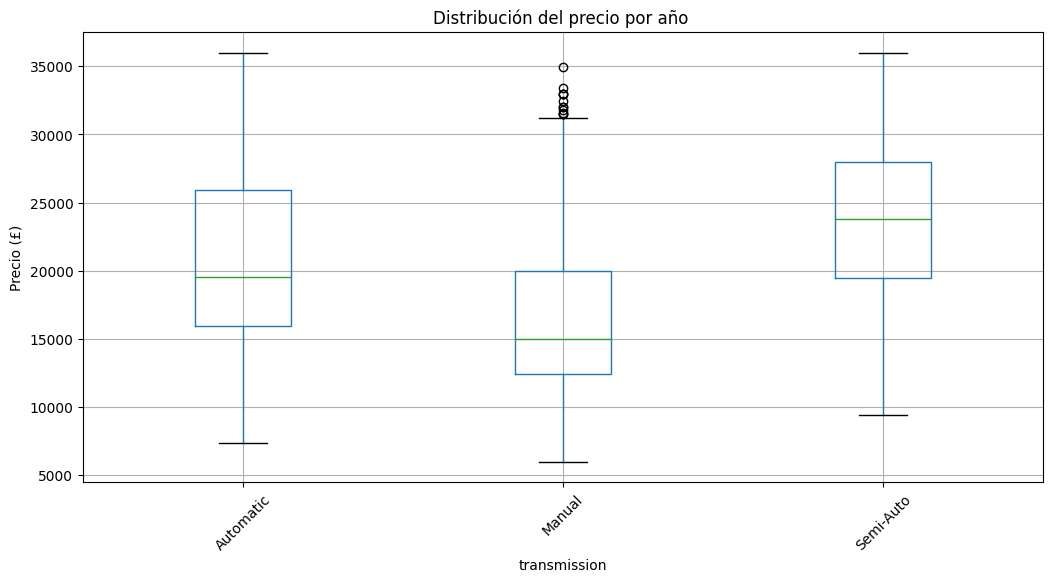

In [ ]:
df_bmw.boxplot(column='price', by=['transmission'], figsize=(12,6))
plt.title("Distribución del precio por transmision ")
plt.suptitle("")  # elimina el título automático extra
plt.xlabel("transmission")
plt.ylabel("Precio (£)")
plt.xticks(rotation=45)
plt.show()

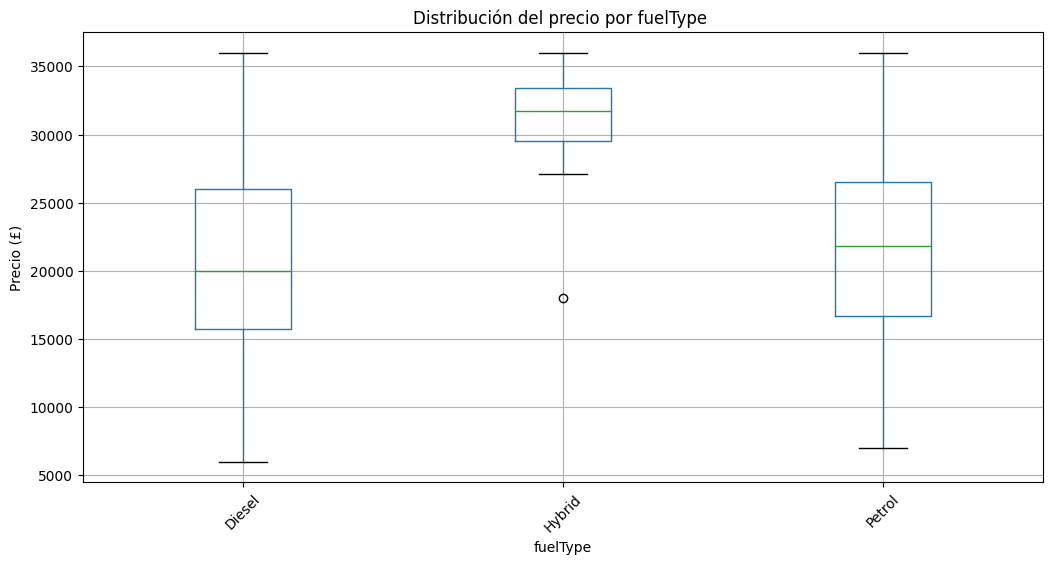

In [13]:

df_bmw.boxplot(column='price', by=['fuelType'], figsize=(12,6))
plt.title("Distribución del precio por fuelType ")
plt.suptitle("")  # elimina el título automático extra
plt.xlabel("fuelType")
plt.ylabel("Precio (£)")
plt.xticks(rotation=45)
plt.show()


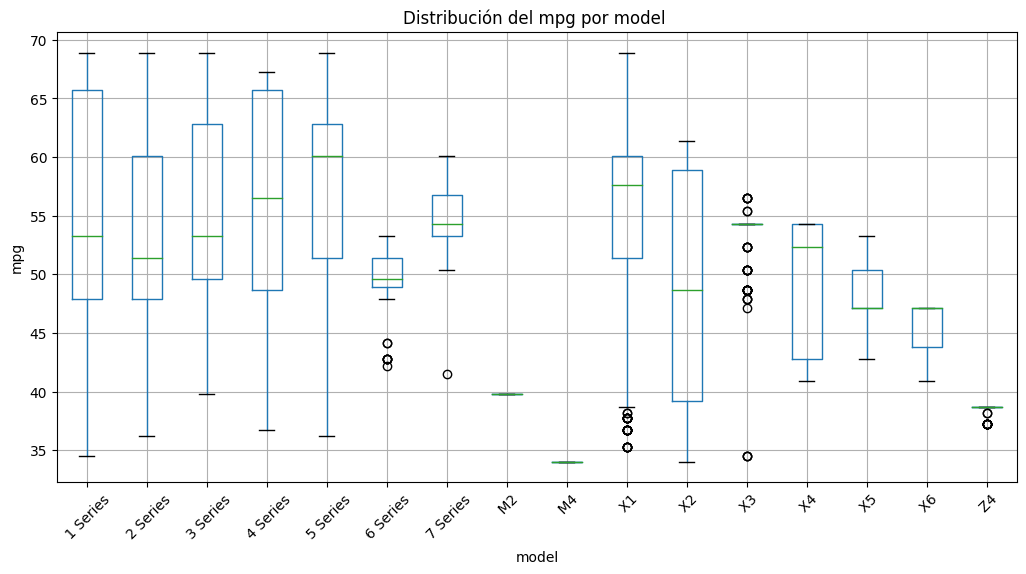

In [16]:

df_bmw.boxplot(column='mpg', by=['model'], figsize=(12,6))
plt.title("Distribución del mpg por model ")
plt.suptitle("")  # elimina el título automático extra
plt.xlabel("model")
plt.ylabel("mpg")
plt.xticks(rotation=45)
plt.show()

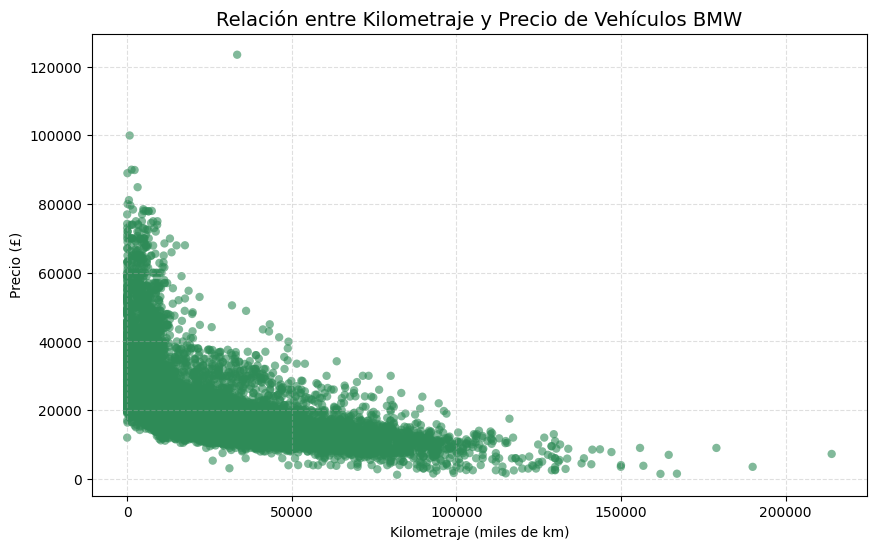

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_bmw, x='mileage', y='price', alpha=0.6, color='seagreen', edgecolor='none')

plt.title("Relación entre Kilometraje y Precio de Vehículos BMW", fontsize=14)
plt.xlabel("Kilometraje (miles de km)")
plt.ylabel("Precio (£)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


- quitar outliers


Estadísticas para la columna: price
1st Percentile: 5994.0, 90th Percentile: 35995.0
Min: 1200, Max: 123456, Mean: 22692.88869092273, Median: 20261.5, Mode: 15000


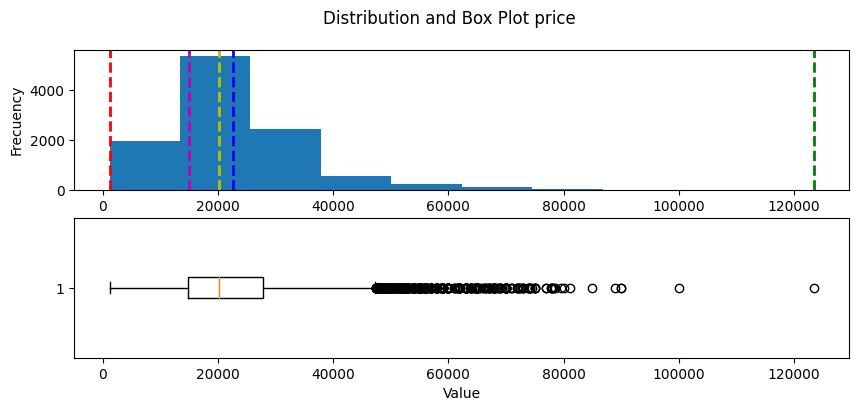


Estadísticas para la columna: mileage
1st Percentile: 10.0, 90th Percentile: 62525.100000000035
Min: 1, Max: 214000, Mean: 27108.994534370402, Median: 21750.0, Mode: 10


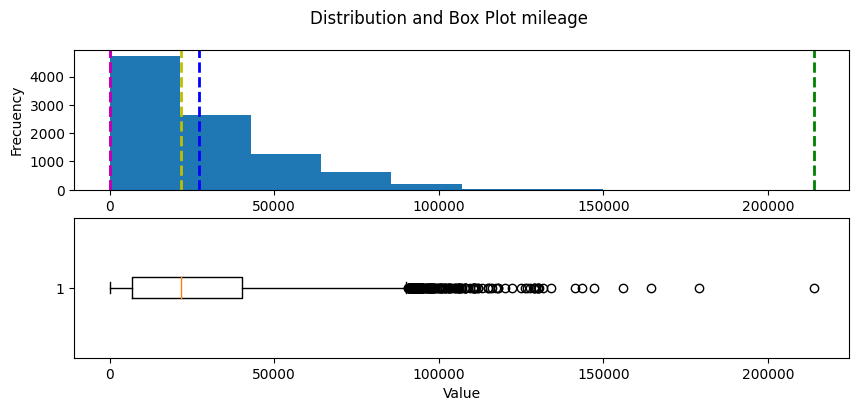


Estadísticas para la columna: tax
1st Percentile: 0.0, 90th Percentile: 160.0
Min: 0, Max: 570, Mean: 131.0369151187397, Median: 145.0, Mode: 145


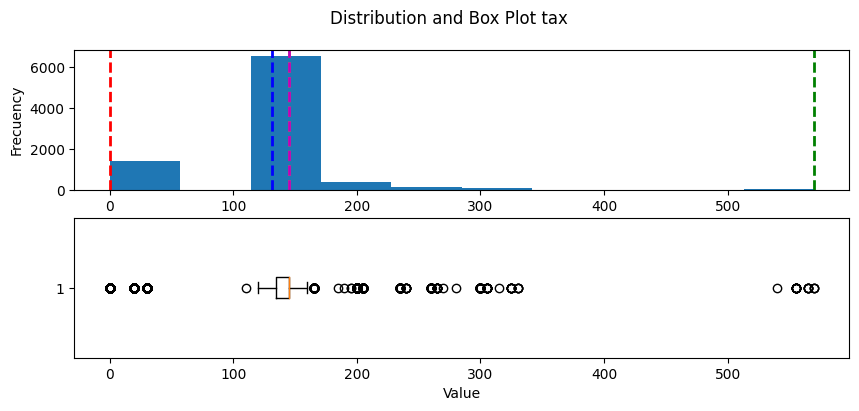


Estadísticas para la columna: mpg
1st Percentile: 34.0, 90th Percentile: 68.9
Min: 8.8, Max: 470.8, Mean: 59.48044949559443, Median: 54.3, Mode: 65.7


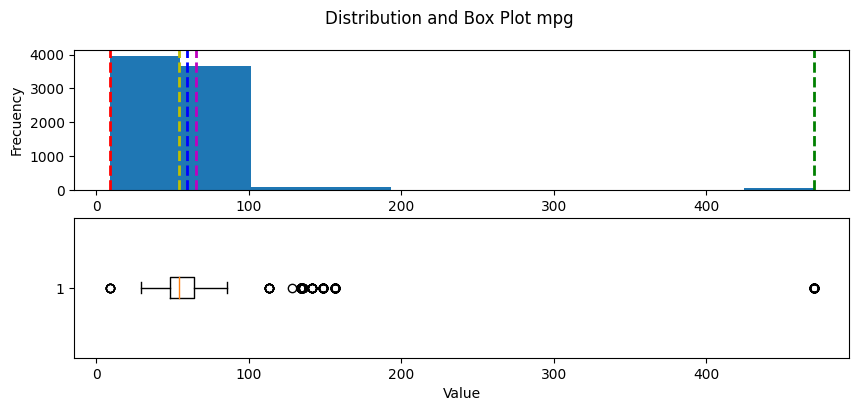


Estadísticas para la columna: engineSize
1st Percentile: 1.5, 90th Percentile: 3.0
Min: 0.0, Max: 4.4, Mean: 2.051283135927806, Median: 2.0, Mode: 2.0


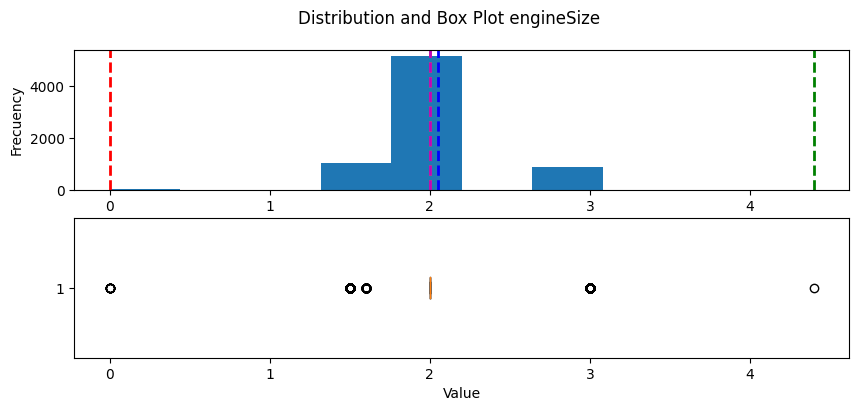

In [8]:
for col in ["price","mileage","tax","mpg","engineSize"]:
    
    print(f"\nEstadísticas para la columna: {col}")
    s = pd.to_numeric(df_bmw[col], errors='coerce')
    p01 = s.quantile(0.01)
    p90 = s.quantile(0.90)
    print(f"1st Percentile: {p01}, 90th Percentile: {p90}")
    
    # Filtra el DataFrame completo conservando las demás columnas
    df_bmw = df_bmw[(s >= p01) & (s <= p90)]
    min_val = s.min()
    max_val = s.max()
    mean_val = s.mean()
    med_val = s.median()
    mod_val = s.mode()[0]
    print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {med_val}, Mode: {mod_val}")

    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    ax[0].hist(s)
    ax[0].set_ylabel('Frecuency')

    ax[0].axvline(min_val, color='r', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(max_val, color='g', linestyle='dashed', linewidth=2, label='Max')
    ax[0].axvline(mean_val, color='b', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(med_val, color='y', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(mod_val, color='m', linestyle='dashed', linewidth=2, label='Mode')
    
    ax[1].boxplot(s, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle('Distribution and Box Plot {name}'.format(name=col))
    plt.show()

- Descargar nuevo data frame sin errores


In [9]:
df_bmw.to_csv("bmw_sin_error.csv", index=False, encoding='utf-8')


### Variables cualitativas

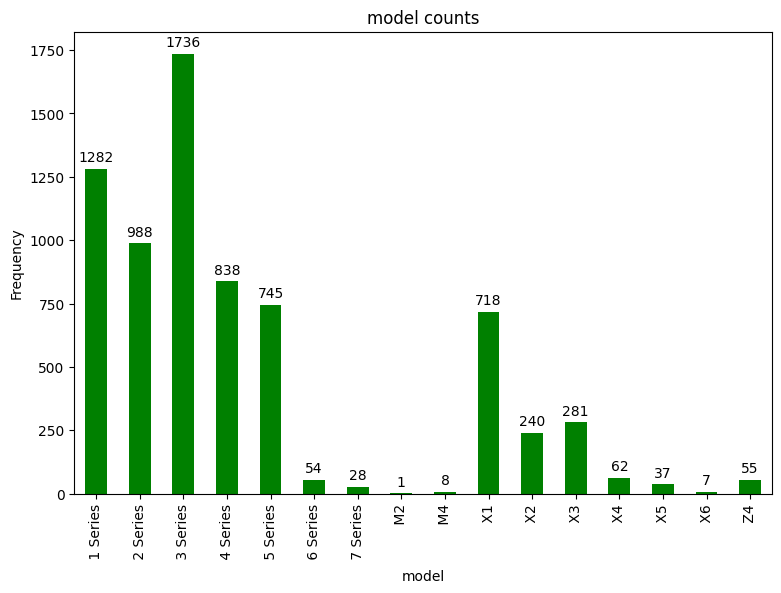

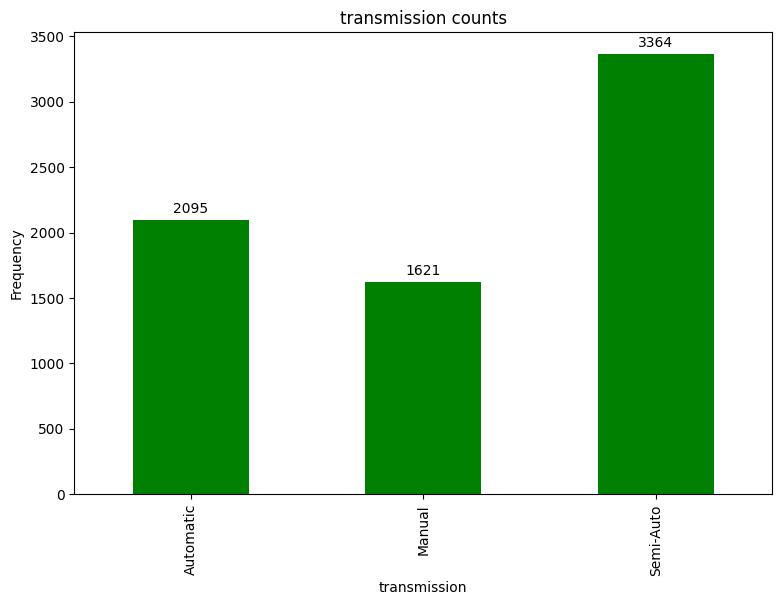

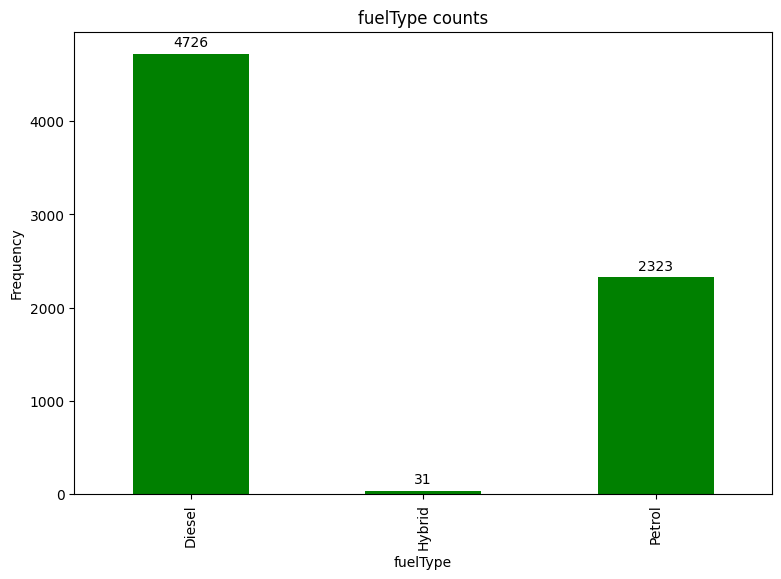

In [10]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['model','transmission','fuelType']

for col in categorical_features:
    counts = df_bmw[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='green', label=col)
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    for container in ax.containers:
        ax.bar_label(container, label_type="edge",padding=3, fontsize=10)
plt.show()